In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn plotly joblib scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Task 1: EDA and Business Insights

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Display basic information
print("Basic Information about the datasets:\n")
print("Customers Dataset Shape:", customers_df.shape)
print("\nProducts Dataset Shape:", products_df.shape)
print("\nTransactions Dataset Shape:", transactions_df.shape)

# Check for missing values
print("\nMissing Values:")
print("\nCustomers Dataset:\n", customers_df.isnull().sum())
print("\nProducts Dataset:\n", products_df.isnull().sum())
print("\nTransactions Dataset:\n", transactions_df.isnull().sum())

#if there is a NAN then check if it mean for normally distributed data
#df["Column_Name"].fillna(df["Column_Name"].mean(), inplace=True)  # Mean
#if there is a NAN then check if it median for skewed data
#df["Column_Name"].fillna(df["Column_Name"].median(), inplace=True)  # Median
#Label missing data as "Unknown" or "Not Specified"
#df["Column_Name"].fillna("Unknown", inplace=True)

Basic Information about the datasets:

Customers Dataset Shape: (200, 4)

Products Dataset Shape: (100, 4)

Transactions Dataset Shape: (1000, 7)

Missing Values:

Customers Dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products Dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions Dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [2]:
# Basic statistics of numerical columns
print("Products Price Statistics:")
print(products_df['Price'].describe())

Products Price Statistics:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [3]:
print("\nTransaction Statistics:")
print(transactions_df[['Quantity', 'TotalValue', 'Price']].describe())


Transaction Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Dataset Shapes:
Customers: (200, 4)
Products: (100, 4)
Transactions: (1000, 7)


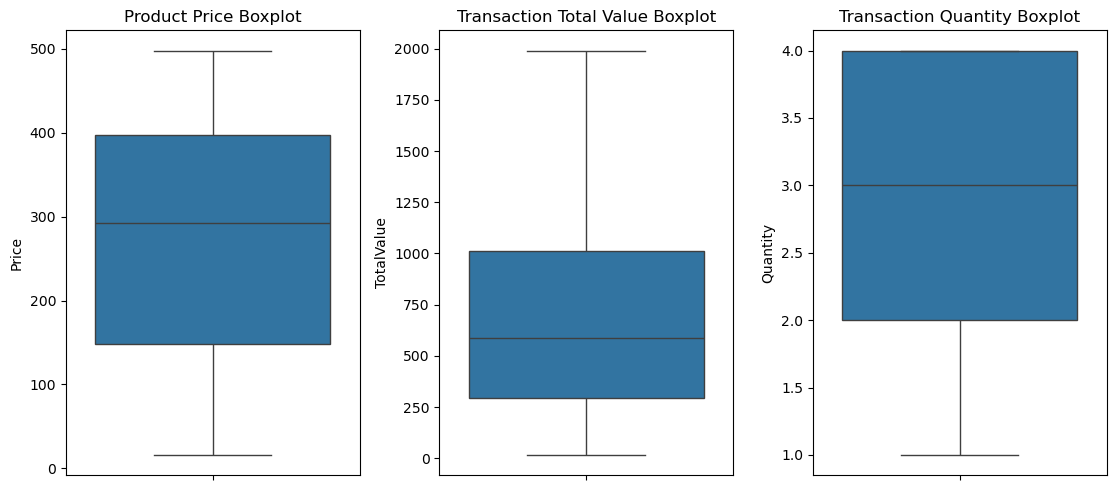

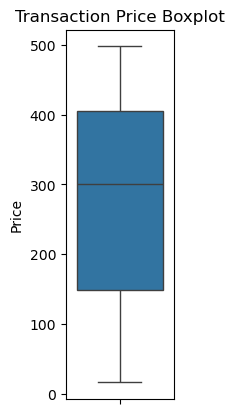

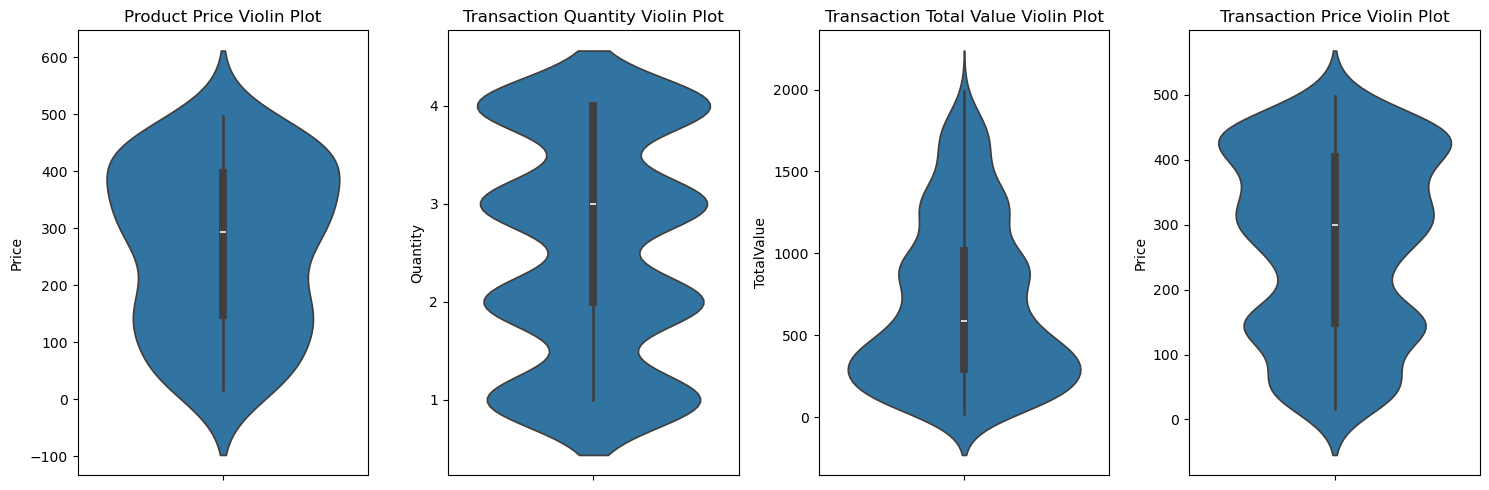

<Figure size 1200x1000 with 0 Axes>

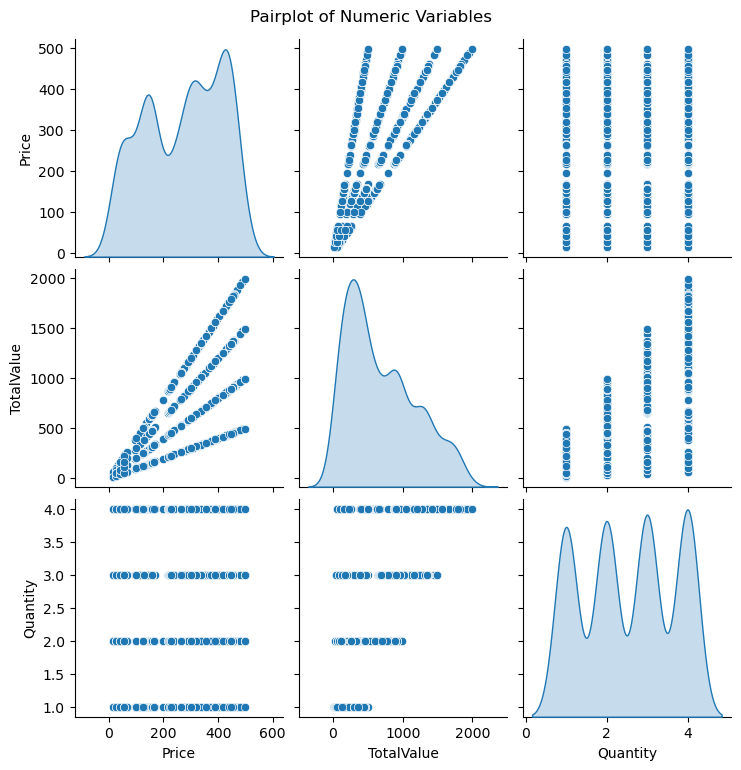

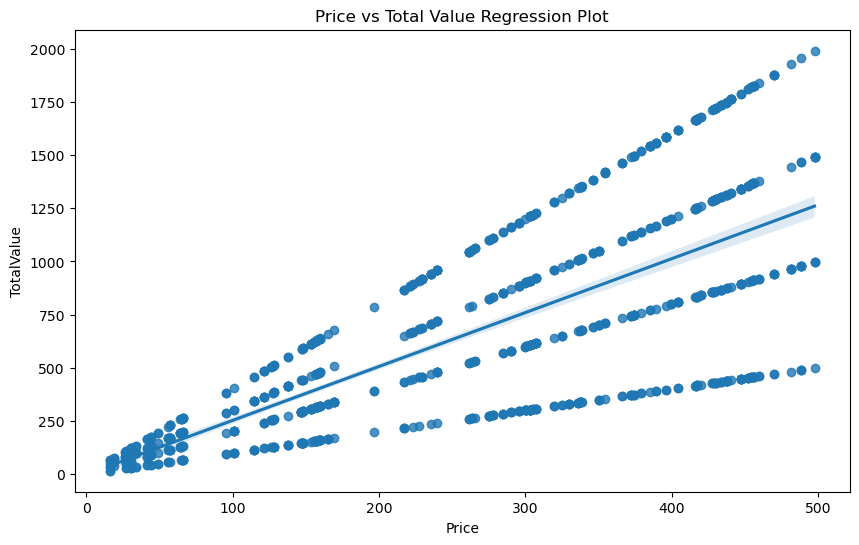

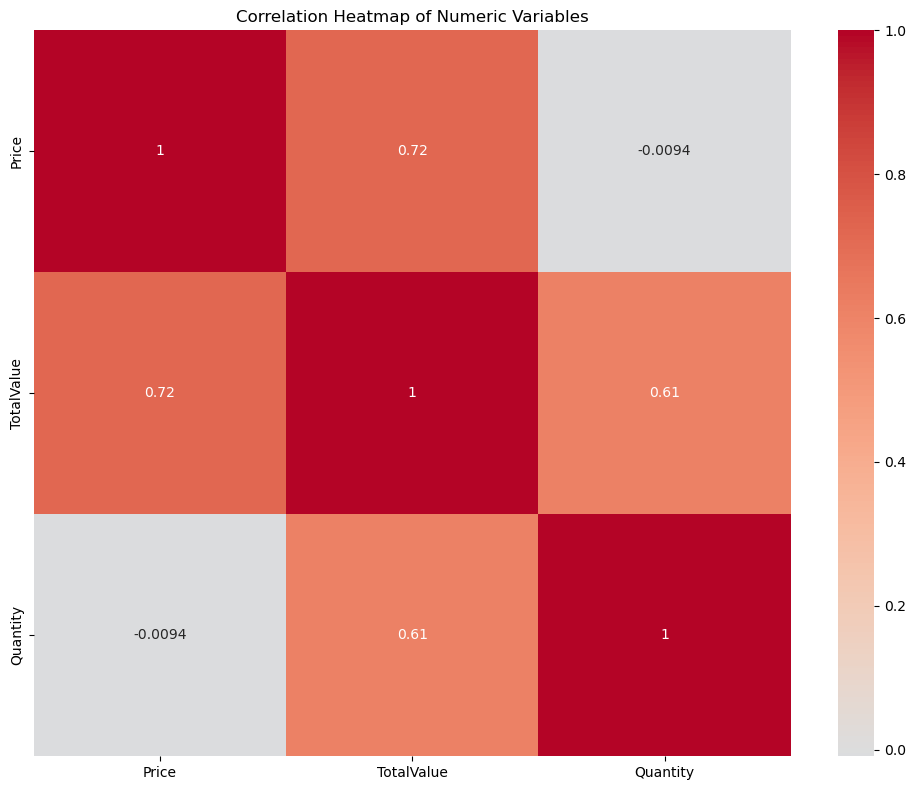

Correlation Matrix:
               Price  TotalValue  Quantity
Price       1.000000    0.722714 -0.009378
TotalValue  0.722714    1.000000  0.609972
Quantity   -0.009378    0.609972  1.000000


In [4]:
#Business Insights INcludes features of seaborn-boxplot,violinplot,pair plot,regression plot,Correlation  
# Basic Statistics
print("Dataset Shapes:")
print(f"Customers: {customers_df.shape}")
print(f"Products: {products_df.shape}")
print(f"Transactions: {transactions_df.shape}")


plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.boxplot(data=products_df, y='Price')
plt.title('Product Price Boxplot')

#Boxplot 
plt.subplot(1, 4, 3)
sns.boxplot(data=transactions_df, y='Quantity')
plt.title('Transaction Quantity Boxplot')

plt.subplot(1, 4, 2)
sns.boxplot(data=transactions_df, y='TotalValue')
plt.title('Transaction Total Value Boxplot')

plt.tight_layout()
plt.show()

plt.subplot(1, 4, 4)
sns.boxplot(data=transactions_df, y='Price')
plt.title('Transaction Price Boxplot')

# Violin Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.violinplot(data=products_df, y='Price')
plt.title('Product Price Violin Plot')

plt.subplot(1, 4, 2)
sns.violinplot(data=transactions_df, y='Quantity')
plt.title('Transaction Quantity Violin Plot')

plt.subplot(1, 4, 3)
sns.violinplot(data=transactions_df, y='TotalValue')
plt.title('Transaction Total Value Violin Plot')


plt.subplot(1, 4, 4)
sns.violinplot(data=transactions_df, y='Price')
plt.title('Transaction Price Violin Plot')

plt.tight_layout()
plt.show()

# Pairplot for Numeric Columns
numeric_columns = ['Price', 'TotalValue', 'Quantity']
combined_df = pd.merge(products_df[['ProductID', 'Price']], 
                       transactions_df[['ProductID', 'TotalValue', 'Quantity']], 
                       on='ProductID')
plt.figure(figsize=(12, 10))
sns.pairplot(combined_df[numeric_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='TotalValue', data=combined_df)
plt.title('Price vs Total Value Regression Plot')
plt.show()



# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = combined_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Advanced Correlation Analysis
print("Correlation Matrix:")
print(correlation_matrix)




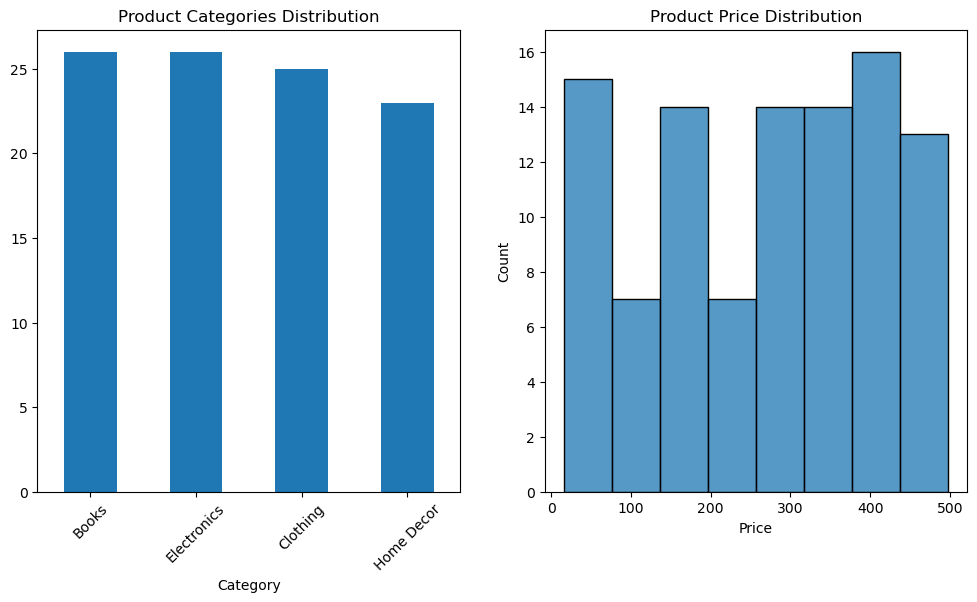

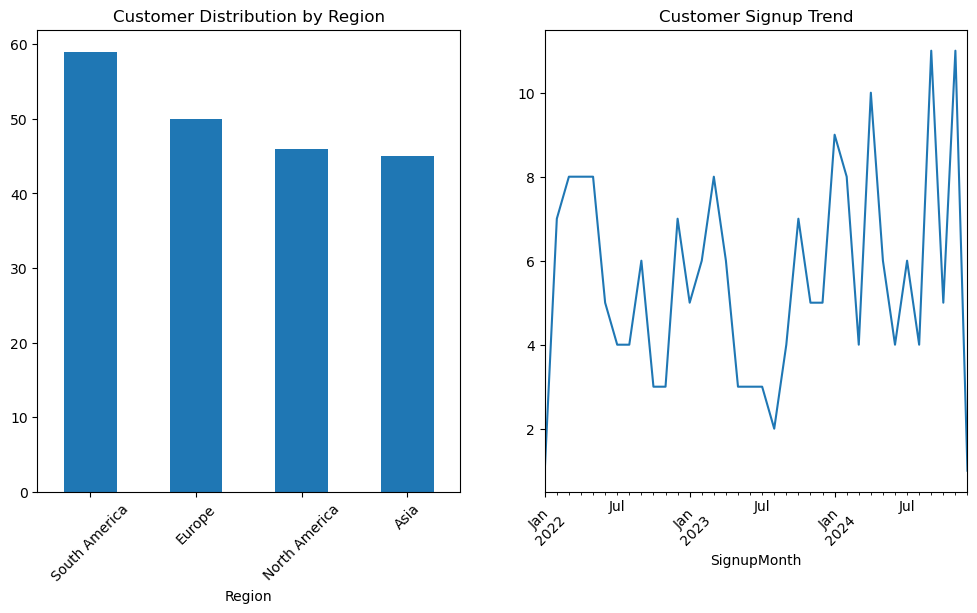

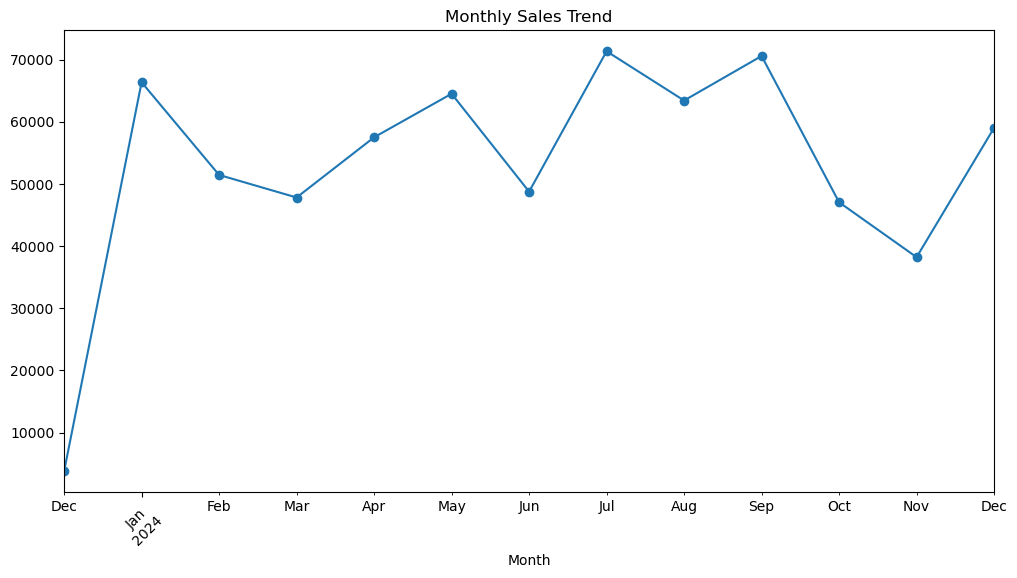

In [5]:
#  Product Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
products_df['Category'].value_counts().plot(kind='bar')
plt.title('Product Categories Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(products_df['Price'])
plt.title('Product Price Distribution')
plt.show()

#  Customer Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)

customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
plt.subplot(1, 2, 2)
customers_df['SignupMonth'].value_counts().sort_index().plot(kind='line')
plt.title('Customer Signup Trend')
plt.xticks(rotation=45)
plt.show()

#  Transaction Analysis
plt.figure(figsize=(12, 6))
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

# Save key statistics for business insights
customer_stats = transactions_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)